### Case Study: Climate Change (Analyzing Temperature Data)

#### Workflow:

(1) Get temperature data

(2) Convert index to datetime object

(3) Plot data

(4) Test for Random Walk

(5) Take first differences (Transforming Non-stationary Series Into Stationary Series)

(6) Compute ACF and PACF

(7) Fit a few AR, MA, and ARMA models

(8) Use Information Criterion (Akaike Information Criterion, AIC) to choose best model

(9) Forecast temperature over next 30 years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.unicode_minus"] = False

import warnings

temp_NY = pd.read_excel("temp_NY.xlsx", index_col=0)

# Convert the index to a datetime object
temp_NY.index = pd.to_datetime(temp_NY.index, format='%Y')

temp_NY

,tmp_avg
DATE,
1870-01-01,53.8
1871-01-01,51.3
1872-01-01,51.3
1873-01-01,50.9
1874-01-01,51.3
1875-01-01,49.4
1876-01-01,51.9
1877-01-01,52.8
1878-01-01,53.6


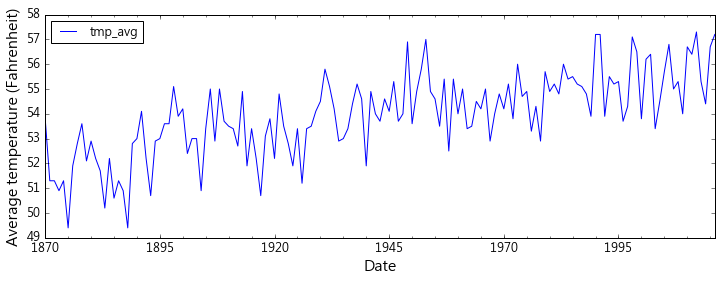

In [2]:
# Plot average temperatures
fig, ax = plt.subplots(figsize=(12,4))
temp_NY.plot(ax=ax)
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Average temperature (Fahrenheit)", fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()

**White Noise**

- Constant mean

- Constant variance

- Zero autocorrelations at all lags

**Random Walk:** $P_{t}$ = $P_{t-1}$ + $ϵ_{t}$

(1) Change is white noise: $P_{t}$ - $P_{t-1}$ = $ϵ_{t}$

- We can't forecast a random walk

(2) Random walk with drift: $P_{t}$ = $μ$ + $P_{t-1}$ + $ϵ_{t}$

- The change is white noise with non-zero mean: $P_{t}$ - $P_{t-1}$ = $μ$ + $ϵ_{t}$

(3) Statistical Test for Random Walk 

a. Dickey-Fuller test

Regression test for random walk: $P_{t}$ = α + β * $P_{t-1}$ + $ϵ_{t}$

hypothesis testing: 

- H : β = 1 (random walk) 

- H : β < 1 (not random walk)

Equivalent to $P_{t}$ − $P_{t-1}$ = α + β * $P_{t-1}$ + $ϵ_{t}$

hypothesis testing:

- H : β = 0 (random walk) 

- H : β < 0 (not random walk)

b. Augmented Dickey-Fuller (ADF) test: If we add more lagged changes on the right hand side.

(4) Interpreting the test result

i. 0th element is test statistic

- More negative means more likely to be stationary

ii. 1st element is p-value

- If p-value is small → reject null hypothesis. Reject non-stationary.

iii. 4th element is the critical test statistics

In [3]:
# Import the adfuller function from the statsmodels module
from statsmodels.tsa.stattools import adfuller

# Compute and print ADF p-value
result = adfuller(temp_NY["tmp_avg"])
print("The p-value for the ADF test is ", result[1])

The p-value for the ADF test is  0.583293898787


**Stationarity**

- Strong stationarity: entire distribution of data is time-invariant

- Weak stationarity: mean, variance and autocorrelation are time-invariant (i.e., corr($X_{t}$ , $X_{t- τ}$) is only a function of $τ$)

(1) Examples of Nonstationary Series

- Random Walk

- Seasonality in series

(2) Transforming Non-stationary Series Into Stationary Series

a. Random Walk

- First difference: df.diff()

b. Seasonality

- Seasonal difference: df.diff(4)

c. Other transforms:

- Take the log: np.log(df)

- Take the square root: np.sqrt(df)

- Take the proportional change: df.shift(1)/df

**Autocorrelation**

(1) Serial correlation: Lag-one autocorrelation

(2) Interpretation of Autocorrelation

- Negative autocorrelation: Mean Reversion

- Positive autocorrelation: Momentum or Trend Following

(3) Autocorrelation Function (ACF): The autocorrelation as a function of the lag

- It equals one at lag-zero

(4) Confidence interval of ACF

a. Argument $\alpha$ sets the width of confidence interval ($\alpha$=0.05)

- If true autocorrelation is zero, it will $\alpha$ * 100% chance to fall outside blue band

b. Wider confidence bands => Lower $\alpha$、Fewer observations

c. Under some simplifying assumptions, 95% confidence bands are ±2/sqrt(N)

d. $\alpha=1$ => no bands on plot

**Autocorrelation Function (ACF) vs Partial autocorrelation function (PACF)**

(1) Using ACF and PACF to choose model order

| |  **AR(p)**  |  **MA(q)**  | **ARMA(p, q)**  |
|:------------:|:------------:|:-----------:|:-----------:|
| **ACF** | tails off | cuts off after lag q | tails off |
| **PACF** | cuts off after lag p | tails off | tails off |

(2) Over/under differencing and ACF and PACF

- ACF values are high and tail off very slowly => the data is non-stationarity. It needs to be differenced.

- ACF at lag 1 is very negative => the difference is taken too many times.

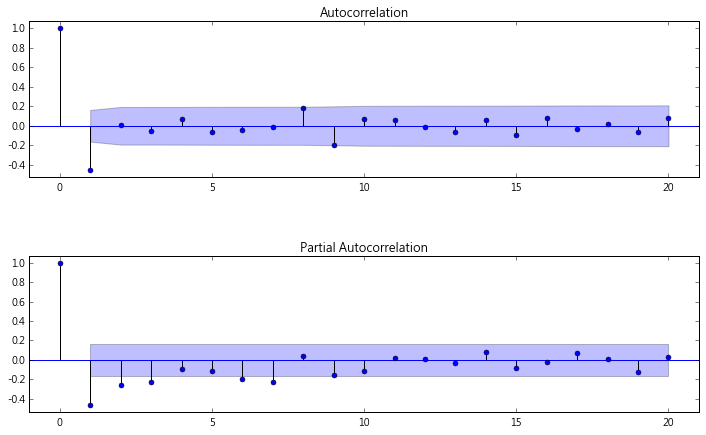

In [4]:
# Import the modules for plotting the sample ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Take first difference of the temperature Series
chg_temp = temp_NY.diff()
chg_temp = chg_temp.dropna()

# Plot the ACF and PACF on the same page
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
plt.subplots_adjust(hspace = 0.5)

# Plot the ACF
plot_acf(chg_temp, lags=20, ax=axes[0])

# Plot the PACF
plot_pacf(chg_temp, lags=20, ax=axes[1])
plt.show()

#### Autoregression (AR)、Moving Average (MA) and Autoregressive moving average (ARMA) models

a. Autoregressive (AR) model

AR(1) model:

$$y_{t} = a_{1} \cdot y_{t−1} + ϵ_{t}$$

AR(2) model:

$$y_{t} = a_{1} \cdot y_{t−1} + a_{2} \cdot y_{t−2} + ϵ_{t}$$

AR(p) model:

$$y_{t} = a_{1} \cdot y_{t−1} + a_{2} \cdot y_{t−2} + ... + a_{p} \cdot y{t−p} + ϵ_{t}$$

b. Moving average (MA) model

MA(1) model:

$$y_{t} = m_{1} \cdot ϵ_{t−1} + ϵ_{t}$$

MA(2) model:

$$y_{t} = m_{1} \cdot ϵ_{t−1} + m_{2} \cdot ϵ_{t−2} + ϵ_{t}$$

MA(q) model:

$$y_{t} = m_{1} \cdot ϵ_{t−1} + m_{2} \cdot ϵ_{t−2} + ... + m_{q} \cdot ϵ_{t−q} + ϵ_{t}$$

c. Autoregressive moving-average (ARMA) model: ARMA = AR + MA

ARMA(1, 1) model:

$$y_{t} = a_{1} \cdot y_{t−1} + m_{1} \cdot ϵ_{t−1} + ϵ_{t}$$

ARMA(p, q):

- p is order of AR part

- q is order of MA part

#### Choosing the best model

Identifying the order of an AR、MA、ARMA model:

(1) The order of an AR(p)、MA(q)、ARMA(p, q) model are usually unknown.

(2) Two techniques to determine order:

a. Partial autocorrelation function (PACF): $ϕ_{n,n}$

b. Information criteria: it adjusts goodness-of-fit for number of parameters

- AIC (Akaike Information Criterion)

- BIC (Bayesian Information Criterion)

(3) Lower AIC/BIC indicates a better model

- AIC/BIC likes to choose simple models with lower order

(4) AIC vs BIC

a. BIC favors simpler models than AIC

b. AIC is better at choosing predictive models

c. BIC is better at choosing good explanatory model

In [5]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA
warnings.filterwarnings('ignore')

# Fit the data to an AR(1) model and print AIC:
mod_ar1 = ARMA(chg_temp, order=(1, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.summary())
print("The AIC for an AR(1) is: ", res_ar1.aic)
print("----------------------------------------------------------------------------------------------")

# Fit the data to an AR(2) model and print AIC:
mod_ar2 = ARMA(chg_temp, order=(0, 1))
res_ar2 = mod_ar2.fit()
print(res_ar2.summary())
print("The AIC for an AR(2) is: ", res_ar2.aic)
print("----------------------------------------------------------------------------------------------")

# Fit the data to an ARMA(1,1) model and print AIC:
mod_arma11 = ARMA(chg_temp, order=(1, 1))
res_arma11 = mod_arma11.fit()
print(res_arma11.summary())
print("The AIC for an ARMA(1,1) is: ", res_arma11.aic)
print("----------------------------------------------------------------------------------------------")

                              ARMA Model Results                              
Dep. Variable:                tmp_avg   No. Observations:                  146
Model:                     ARMA(1, 0)   Log Likelihood                -252.267
Method:                       css-mle   S.D. of innovations              1.361
Date:                Sat, 04 Jan 2020   AIC                            510.535
Time:                        13:50:15   BIC                            519.486
Sample:                    01-01-1871   HQIC                           514.172
                         - 01-01-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0277      0.077      0.360      0.720      -0.123       0.179
ar.L1.tmp_avg    -0.4629      0.074     -6.278      0.000      -0.607      -0.318
                                    Root

**Autoregressive Integrated Moving Average (ARIMA) models**

(1) ARIMA model:

- Take the difference

- Fit ARMA model

- Integrate forecast

(2) order = (p, d, q):

- p - number of autoregressive lags

- d - order of differencing

- q - number of moving average lags

(3) ARIMA(p, 0, q) = ARMA(p, q)

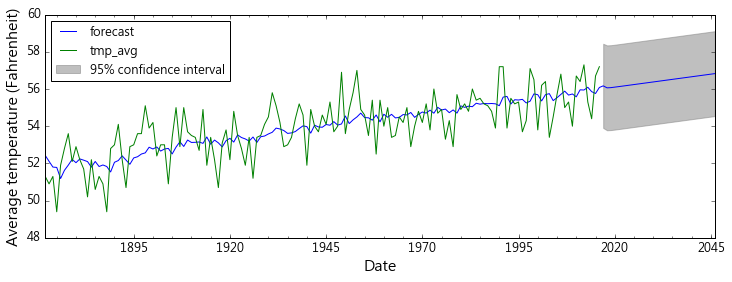

In [6]:
# Import the ARIMA module from statsmodels
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings('ignore')

# Forecast temperatures using an ARIMA(1,1,1) model
mod = ARIMA(temp_NY, order=(1, 1, 1))
res = mod.fit()

# Plot the original series and the forecasted series
fig, ax = plt.subplots(figsize=(12, 4))
res.plot_predict(start='1872-01-01', end='2046-01-01', ax=ax)
ax.set_xlabel("Date", fontsize = 15)
ax.set_ylabel("Average temperature (Fahrenheit)", fontsize = 15)
ax.tick_params(axis = 'both', labelsize = 12)
plt.show()